#-------------------------------------------------------------
# **Mohammad Amin Kiani || 4003613052**
## University of Isfahan - CE
## NLP 403-404
###### Text PreProcessing

1-Installs

In [1]:
!pip install hazm nltk wordcloud matplotlib

import nltk
nltk.download('punkt')
nltk.download('stopwords')
# nltk.download('all')

print("All packages are successfully installed!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


All packages are successfully installed!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2- for farsi font

In [8]:
import requests

url = "https://github.com/rastikerdar/vazir-font/releases/download/v33.003/Vazir.ttf"
font_path = "/content/Vazir.ttf"

response = requests.get(url)

if response.status_code == 200:
    with open(font_path, "wb") as f:
        f.write(response.content)
    print("Persian font downloaded and saved successfully!")
else:
    print("Failed to download font. Status code:", response.status_code)


Failed to download font. Status code: 404


3- Libs

In [11]:
# Import necessary libraries
import re
import os
import urllib.request
import nltk  # for english
import hazm  # for farsi
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK components
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')  # for Lemm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

4- Main

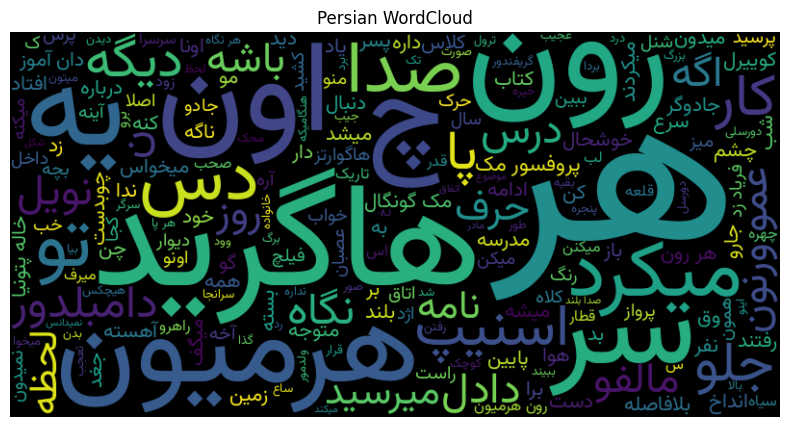

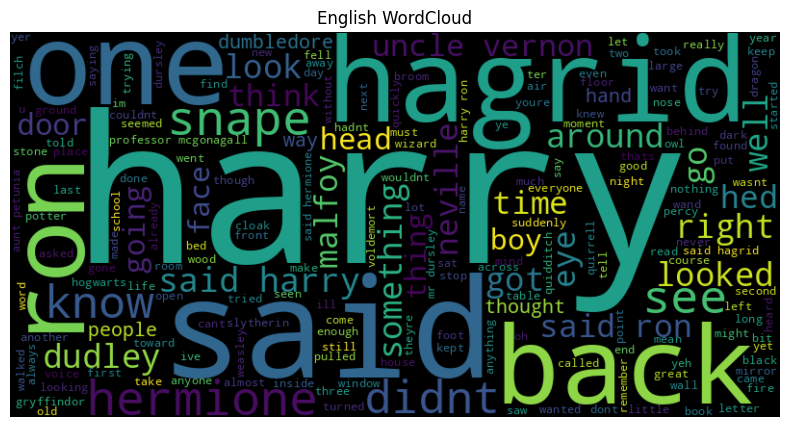

✅ Processed Persian text saved at: /content/processed_hp_fa.txt
✅ Processed English text saved at: /content/processed_hp_en.txt


In [12]:

# Load Persian text
file_path_fa = "/content/hp_fa.txt"
with open(file_path_fa, "r", encoding="utf-8") as file:
    text_fa = file.read()

# Load English text
file_path_en = "/content/hp_en.txt"
with open(file_path_en, "r", encoding="utf-8") as file:
    text_en = file.read()

# Persian font path
persian_font_path = "/content/Vazir.ttf"

# Try to download font if it doesn't exist
if not os.path.exists(persian_font_path):
    try:
        print("Downloading Persian font...")
        url = "https://github.com/rastikerdar/vazir-font/releases/download/v33.003/Vazir-Regular.ttf"
        urllib.request.urlretrieve(url, persian_font_path)
        print("Persian font downloaded successfully!")
    except Exception as e:
        print("Font download failed:", e)
        print("Please upload a Persian font file (e.g., Vazir.ttf) manually to /content/")

# Persian stopwords list
persian_stopwords = set(hazm.stopwords_list())

# English stopwords list
english_stopwords = set(stopwords.words("english"))

# Initialize Lemmatizer for English
lemmatizer = WordNetLemmatizer()

# Preprocessing function for Persian text
def preprocess_farsi(text):
    # نرمال‌سازی متن (تبدیل "ي" به "ی"، "ك" به "ک"، و اصلاح علائم)
    normalizer = hazm.Normalizer()
    text = normalizer.normalize(text)

    # حذف فاصله‌های اضافی
    text = re.sub(r'\s+', ' ', text)

    # حذف علائم نگارشی
    text = re.sub(r'[^\w\s]', '', text)

    # حذف اعداد
    text = re.sub(r'\d+', '', text)

    # تبدیل متن به کلمات (توکن‌بندی)
    words = hazm.word_tokenize(text)

    # حذف کلمات توقف
    words = [word for word in words if word not in persian_stopwords]

    # اعمال استمینگ (ریشه‌یابی)
    stemmer = hazm.Stemmer()
    words = [stemmer.stem(word) for word in words]

    return " ".join(words)

# Preprocessing function for English text
def preprocess_english(text):
    # تبدیل به حروف کوچک
    text = text.lower()

    # حذف فاصله‌های اضافی
    text = re.sub(r'\s+', ' ', text)

    # حذف علائم نگارشی
    text = re.sub(r'[^\w\s]', '', text)

    # حذف اعداد
    text = re.sub(r'\d+', '', text)

    # حذف URL ها
    text = re.sub(r'http\S+', '', text)

    # تبدیل متن به کلمات (توکن‌بندی)
    words = word_tokenize(text)

    # حذف کلمات توقف
    words = [word for word in words if word not in english_stopwords]

    # اعمال لماتیزیشن (ریشه‌یابی)
    words = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(words)

# Apply preprocessing
processed_text_fa = preprocess_farsi(text_fa)
processed_text_en = preprocess_english(text_en)

# Save processed text to files
processed_fa_path = "/content/processed_hp_fa.txt"
processed_en_path = "/content/processed_hp_en.txt"

with open(processed_fa_path, "w", encoding="utf-8") as file:
    file.write(processed_text_fa)

with open(processed_en_path, "w", encoding="utf-8") as file:
    file.write(processed_text_en)

# Generate WordCloud for Persian text only if font exists
if os.path.exists(persian_font_path):
    wordcloud_fa = WordCloud(width=800, height=400, font_path=persian_font_path).generate(processed_text_fa)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_fa, interpolation="bilinear")
    plt.axis("off")
    plt.title("Persian WordCloud")
    plt.show()
else:
    print("Persian font not available. Skipping Persian WordCloud...")

# Generate WordCloud for English text
wordcloud_en = WordCloud(width=800, height=400).generate(processed_text_en)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_en, interpolation="bilinear")
plt.axis("off")
plt.title("English WordCloud")
plt.show()

# Provide file locations
print(f"Processed Persian text saved at: {processed_fa_path}")
print(f"Processed English text saved at: {processed_en_path}")


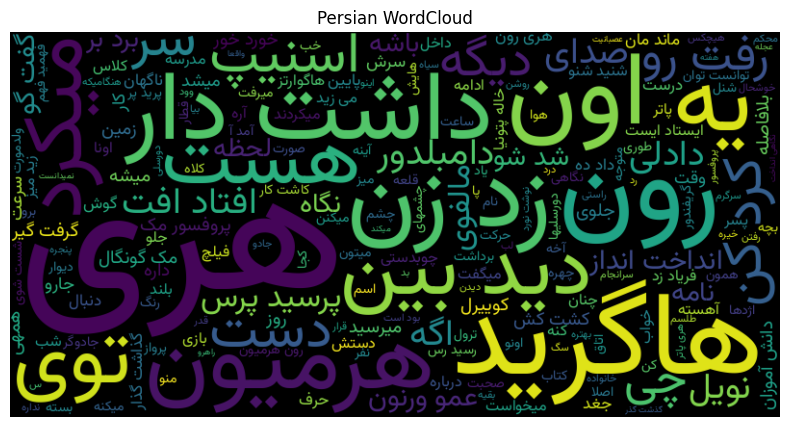

Processed Persian text saved at: /content/NewProcessed_hp_fa.txt


In [13]:
# Import necessary libraries
import re
import os
import urllib.request
import hazm  # برای پردازش فارسی
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load Persian text
file_path_fa = "/content/hp_fa.txt"
with open(file_path_fa, "r", encoding="utf-8") as file:
    text_fa = file.read()

# Persian font path
persian_font_path = "/content/Vazir.ttf"

# Try to download font if it doesn't exist
if not os.path.exists(persian_font_path):
    try:
        print("Downloading Persian font...")
        url = "https://github.com/rastikerdar/vazir-font/releases/download/v33.003/Vazir-Regular.ttf"
        urllib.request.urlretrieve(url, persian_font_path)
        print("Persian font downloaded successfully!")
    except Exception as e:
        print("Font download failed:", e)
        print("Please upload a Persian font file (e.g., Vazir.ttf) manually to /content/")

# Persian stopwords list
persian_stopwords = set(hazm.stopwords_list())

# Initialize Hazm tools
normalizer = hazm.Normalizer()
lemmatizer = hazm.Lemmatizer()

# Preprocessing function for Persian text
def preprocess_farsi(text):
    # 1. حذف فضاهای خالی اضافه
    text = re.sub(r'\s+', ' ', text)

    # 2. تجزیه متن به جملات
    sentences = hazm.sent_tokenize(text)

    processed_sentences = []

    for sentence in sentences:
        # 3. نرمال‌سازی متن
        sentence = normalizer.normalize(sentence)

        # 4. تجزیه جملات به کلمات
        words = hazm.word_tokenize(sentence)

        # 5. حذف علائم نگارشی
        words = [re.sub(r'[^\w\s]', '', word) for word in words]

        # 6. حذف ایست واژه‌ها
        words = [word for word in words if word not in persian_stopwords]

        # 7. حذف ایموجی‌ها
        words = [re.sub(r'[^\w\s]', '', word) for word in words]  # حذف ایموجی‌ها با فیلترگذاری روی کلمات غیرمتنی

        # 8. اعمال فرآیند لم‌سازی
        words = [lemmatizer.lemmatize(word) for word in words]

        # ذخیره جملات پردازش‌شده
        processed_sentences.append(" ".join(words))

    return " ".join(processed_sentences)

# Apply preprocessing
processed_text_fa = preprocess_farsi(text_fa)

# Save processed text to file
processed_fa_path = "/content/NewProcessed_hp_fa.txt"

with open(processed_fa_path, "w", encoding="utf-8") as file:
    file.write(processed_text_fa)

# Generate WordCloud for Persian text only if font exists
if os.path.exists(persian_font_path):
    wordcloud_fa = WordCloud(width=800, height=400, font_path=persian_font_path).generate(processed_text_fa)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_fa, interpolation="bilinear")
    plt.axis("off")
    plt.title("Persian WordCloud")
    plt.show()
else:
    print("Persian font not available. Skipping Persian WordCloud...")

# Provide file location
print(f"Processed Persian text saved at: {processed_fa_path}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


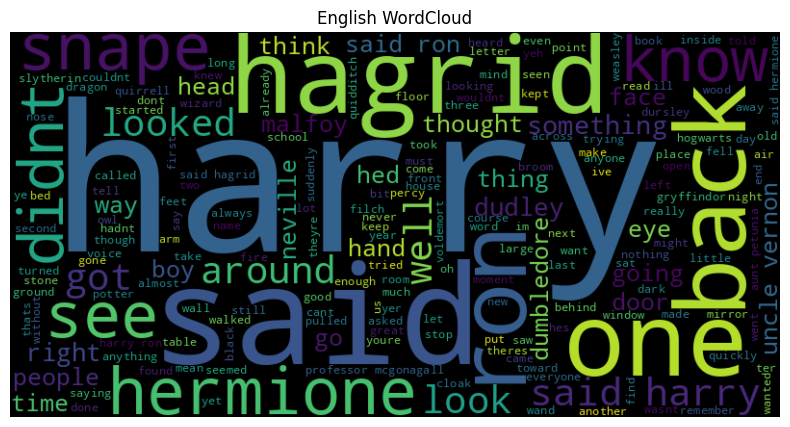

Processed English text saved at: /content/NewProcessed_hp_en.txt


In [16]:
# Import necessary libraries
import re
import os
import urllib.request
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK components
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')  # for Lemm

# Load English text
file_path_en = "/content/hp_en.txt"
with open(file_path_en, "r", encoding="utf-8") as file:
    text_en = file.read()

# English stopwords list
english_stopwords = set(stopwords.words("english"))

# Preprocessing function for English text
def preprocess_english(text):
    # 1. حذف فضاهای خالی اضافه
    text = re.sub(r'\s+', ' ', text)

    # 2. تجزیه متن به جملات
    sentences = sent_tokenize(text)

    processed_sentences = []

    for sentence in sentences:
        # 3. تبدیل حروف بزرگ به کوچک
        sentence = sentence.lower()

        # 4. تجزیه جملات به کلمات
        words = word_tokenize(sentence)

        # 5. حذف اعداد و URL ها
        words = [word for word in words if not word.isdigit() and not word.startswith("http")]

        # 6. حذف علائم نگارشی و ایست واژه‌ها
        words = [re.sub(r'[^\w\s]', '', word) for word in words if word not in english_stopwords]

        # ذخیره جملات پردازش‌شده
        processed_sentences.append(" ".join(words))

    return " ".join(processed_sentences)

# Apply preprocessing
processed_text_en = preprocess_english(text_en)

# Save processed text to file
processed_en_path = "/content/NewProcessed_hp_en.txt"

with open(processed_en_path, "w", encoding="utf-8") as file:
    file.write(processed_text_en)

# Generate WordCloud for English text
wordcloud_en = WordCloud(width=800, height=400).generate(processed_text_en)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_en, interpolation="bilinear")
plt.axis("off")
plt.title("English WordCloud")
plt.show()

# Provide file location
print(f"Processed English text saved at: {processed_en_path}")


In [ ]:
# # Import necessary libraries
# import re
# import nltk
# import os
# import urllib.request
# from nltk.tokenize import sent_tokenize, word_tokenize
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # Download necessary NLTK components
# nltk.download('punkt')

# # Load Persian text
# file_path_fa = "/content/hp_fa.txt"
# with open(file_path_fa, "r", encoding="utf-8") as file:
#     text_fa = file.read()

# # Load English text
# file_path_en = "/content/hp_en.txt"
# with open(file_path_en, "r", encoding="utf-8") as file:
#     text_en = file.read()

# # Persian font path
# persian_font_path = "/content/Vazir.ttf"

# # Try to download font if it doesn't exist
# if not os.path.exists(persian_font_path):
#     try:
#         print("Downloading Persian font...")
#         url = "https://github.com/rastikerdar/vazir-font/releases/download/v33.003/Vazir-Regular.ttf"
#         urllib.request.urlretrieve(url, persian_font_path)
#         print("Persian font downloaded successfully!")
#     except Exception as e:
#         print("Font download failed:", e)
#         print("Please upload a Persian font file (e.g., Vazir.ttf) manually to /content/")

# # Preprocessing function for Persian text
# def preprocess_farsi(text):
#     text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
#     text = re.sub(r'[^\w\s]', '', text)  # Remove punctuations
#     text = re.sub(r'\d+', '', text)  # Remove numbers
#     words = text.split()  # Tokenize words
#     return " ".join(words)

# # Preprocessing function for English text
# def preprocess_english(text):
#     text = text.lower()  # Convert to lowercase
#     text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
#     text = re.sub(r'[^\w\s]', '', text)  # Remove punctuations
#     text = re.sub(r'http\S+', '', text)  # Remove URLs
#     words = text.split()  # Tokenize words
#     return " ".join(words)

# # Apply preprocessing
# processed_text_fa = preprocess_farsi(text_fa)
# processed_text_en = preprocess_english(text_en)

# # Save processed text to files
# processed_fa_path = "/content/processed_hp_fa.txt"
# processed_en_path = "/content/processed_hp_en.txt"

# with open(processed_fa_path, "w", encoding="utf-8") as file:
#     file.write(processed_text_fa)

# with open(processed_en_path, "w", encoding="utf-8") as file:
#     file.write(processed_text_en)

# # Generate WordCloud for Persian text only if font exists
# if os.path.exists(persian_font_path):
#     wordcloud_fa = WordCloud(width=800, height=400, font_path=persian_font_path).generate(processed_text_fa)
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud_fa, interpolation="bilinear")
#     plt.axis("off")
#     plt.title("Persian WordCloud")
#     plt.show()
# else:
#     print("Persian font not available. Skipping Persian WordCloud...")

# # Generate WordCloud for English text
# wordcloud_en = WordCloud(width=800, height=400).generate(processed_text_en)
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud_en, interpolation="bilinear")
# plt.axis("off")
# plt.title("English WordCloud")
# plt.show()

# # Provide file locations
# print(f"Processed Persian text saved at: {processed_fa_path}")
# print(f"Processed English text saved at: {processed_en_path}")